In [1]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

1.10.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

In [3]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [4]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, padding='same',input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2),strides=(2,2)),
    keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D((2, 2),strides=(2,2)),
    keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
__________

In [5]:
history = model.fit(train_images, train_labels, batch_size=256, validation_data=(test_images, test_labels), epochs=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 10s 169us/step - loss: 0.6754 - acc: 0.7517 - val_loss: 0.4106 - val_acc: 0.8504
Epoch 2/50
60000/60000 [==============================] - 7s 123us/step - loss: 0.3969 - acc: 0.8574 - val_loss: 0.3481 - val_acc: 0.8706
Epoch 3/50
60000/60000 [==============================] - 7s 122us/step - loss: 0.3412 - acc: 0.8757 - val_loss: 0.3242 - val_acc: 0.8810
Epoch 4/50
60000/60000 [==============================] - 7s 122us/step - loss: 0.3074 - acc: 0.8874 - val_loss: 0.3013 - val_acc: 0.8940
Epoch 5/50
60000/60000 [==============================] - 7s 122us/step - loss: 0.2863 - acc: 0.8955 - val_loss: 0.2754 - val_acc: 0.8976
Epoch 6/50
60000/60000 [==============================] - 7s 123us/step - loss: 0.2676 - acc: 0.9024 - val_loss: 0.2718 - val_acc: 0.9005
Epoch 7/50
60000/60000 [==============================] - 7s 123us/step - loss: 0.2548 - acc: 0.9052 - val_loss: 0.2613 -

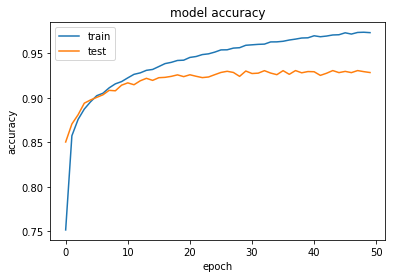

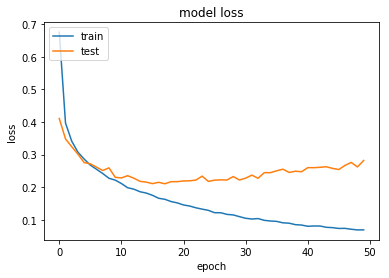

In [8]:
# plot accuracy history
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot loss history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()